<a href="https://colab.research.google.com/github/valesierrai/Integracion-de-Datos-y-Prospectiva/blob/main/Reto_Parcial_1_VSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Reto Parcial 1**

##0. Cargamos Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew #Coeficiente de Asimetría
from scipy.stats import kurtosis #Kurtosis
import random as rnd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1. Cargamos y Organizamos las Bases de Datos (Archivo de Trabajo)

In [ ]:
def cargar_y_limpiar_datos(x):
  nxl = '/content/drive/MyDrive/Colab Notebooks/Integración de Datos y Prospectiva/Bases de Datos/3. Perdida Productividad_Zonas(I) (1).xlsx'
  df = pd.read_excel(nxl, sheet_name=x)
  df = df.dropna()
  df.rename(columns={'Unnamed: 0': 'Fecha'}, inplace=True) #A la columna "Unnamed: 0" le ponemos fecha
  return df

###1.1. Datos Internos

In [ ]:
XDBo = cargar_y_limpiar_datos(1)
XDBo.head()

,Fecha,Mensual,P.Semestral,Díaria,WD,Pérdida,Unnamed: 6,Fecuencia,Severidad,LDA
5,2000-06-01,64.955687,89.691966,2.165190,2.334810,118307.851160,1.0,91.0,118307.851160,1.076601e+07
6,2000-07-01,72.427269,85.403259,2.414242,2.085758,113101.344906,2.0,29.0,113101.344906,3.279939e+06
7,2000-08-01,88.738739,80.174771,2.957958,1.542042,72643.590729,3.0,26.0,72643.590729,1.888733e+06
8,2000-09-01,48.902974,80.807229,1.630099,2.869901,135696.649903,4.0,54.0,135696.649903,7.327619e+06
9,2000-10-01,58.218901,78.338778,1.940630,2.559370,141051.666123,5.0,100.0,141051.666123,1.410517e+07


###1.2. Datos Externos

In [ ]:
#Cargamos los datos de la Finca 1
XDBe1 = cargar_y_limpiar_datos(3)
XDBe1.head()

,Fecha,Mensual,P.Semestral,Díaria,WD,Pérdida,Unnamed: 6,Fecuencia,Severidad,LDA
5,2000-06-01,64.955687,89.691966,2.165190,2.334810,126198.892440,1.0,84.0,126198.892440,1.060071e+07
6,2000-07-01,72.427269,85.403259,2.414242,2.085758,114286.711071,2.0,55.0,114286.711071,6.285769e+06
7,2000-08-01,88.738739,80.174771,2.957958,1.542042,91398.859138,3.0,94.0,91398.859138,8.591493e+06
8,2000-09-01,48.902974,80.807229,1.630099,2.869901,165183.451432,4.0,22.0,165183.451432,3.634036e+06
9,2000-10-01,58.218901,78.338778,1.940630,2.559370,148327.520757,5.0,96.0,148327.520757,1.423944e+07


In [ ]:
#Cargamos los datos de la Finca 2
XDBe2 = cargar_y_limpiar_datos(5)
XDBe2.head()

,Fecha,Mensual,P.Semestral,Díaria,WD,Pérdida,Unnamed: 6,Fecuencia,Severidad,LDA
5,2000-06-01,64.955687,89.691966,2.165190,2.334810,103285.403374,1.0,80.0,103285.403374,8.262832e+06
6,2000-07-01,72.427269,85.403259,2.414242,2.085758,124543.811110,2.0,95.0,124543.811110,1.183166e+07
7,2000-08-01,88.738739,80.174771,2.957958,1.542042,101070.350806,3.0,54.0,101070.350806,5.457799e+06
8,2000-09-01,48.902974,80.807229,1.630099,2.869901,163620.052400,4.0,44.0,163620.052400,7.199282e+06
9,2000-10-01,58.218901,78.338778,1.940630,2.559370,121550.520491,5.0,88.0,121550.520491,1.069645e+07


In [ ]:
#Cargamos los datos de la Finca 3
XDBe3 = cargar_y_limpiar_datos(7)
XDBe3.head()

,Fecha,Mensual,P.Semestral,Díaria,WD,Pérdida,Unnamed: 6,Fecuencia,Severidad,LDA
5,2000-06-01,64.955687,89.691966,2.165190,2.334810,108116.631683,1.0,17.0,108116.631683,1.837983e+06
6,2000-07-01,72.427269,85.403259,2.414242,2.085758,125293.481717,2.0,61.0,125293.481717,7.642902e+06
7,2000-08-01,88.738739,80.174771,2.957958,1.542042,79627.652571,3.0,93.0,79627.652571,7.405372e+06
8,2000-09-01,48.902974,80.807229,1.630099,2.869901,144882.742714,4.0,41.0,144882.742714,5.940192e+06
9,2000-10-01,58.218901,78.338778,1.940630,2.559370,162232.024679,5.0,47.0,162232.024679,7.624905e+06


In [ ]:
#Cargamos los datos de la Finca 4
XDBe4 = cargar_y_limpiar_datos(9)
XDBe4.head()

,Fecha,Mensual,P.Semestral,Díaria,WD,Pérdida,Unnamed: 6,Fecuencia,Severidad,LDA
5,2000-06-01,64.955687,89.691966,2.165190,2.334810,106211.976860,1.0,18.0,106211.976860,1.911816e+06
6,2000-07-01,72.427269,85.403259,2.414242,2.085758,100704.345428,2.0,49.0,100704.345428,4.934513e+06
7,2000-08-01,88.738739,80.174771,2.957958,1.542042,95783.407772,3.0,12.0,95783.407772,1.149401e+06
8,2000-09-01,48.902974,80.807229,1.630099,2.869901,173230.107155,4.0,36.0,173230.107155,6.236284e+06
9,2000-10-01,58.218901,78.338778,1.940630,2.559370,115946.132273,5.0,32.0,115946.132273,3.710276e+06


###1.3. Sacamos la Estimación de las Pérdidas (Distribución de las Pérdidas - LDA)

In [ ]:
LDAo = np.multiply(XDBo.iloc[:,7], XDBo.iloc[:,8])
LDAe1 = np.multiply(XDBe1.iloc[:,7], XDBe1.iloc[:,8])
LDAe2 = np.multiply(XDBe2.iloc[:,7], XDBe2.iloc[:,8])
LDAe3 = np.multiply(XDBe3.iloc[:,7], XDBe3.iloc[:,8])
LDAe4 = np.multiply(XDBe4.iloc[:,7], XDBe4.iloc[:,8])

##2.  Creamos el método para calcular las propiedades estadisticas de una variable y el tipo de distribución



In [ ]:
def metricas (XLDA, p):

  u = np.mean(XLDA)           #Media
  var = np.var(XLDA)          #Varianza
  stdv = np.sqrt(var)         #Desviación Estándar
  cas = skew(XLDA)            #Coeficiente de Asimetría
  kur = kurtosis(XLDA)        #Coeficiente de Curtosis
  ND = len(XLDA)              #Número de Datos
  ek2= ((1.96**2)*p*(1-p)/ND) #Error

  #Tipo de Distribución
  if abs(cas) < 0.5 and abs(kur) < 0.5:
    tpdist = 'Posible distribución normal'
  elif cas > 0 and abs(kur) > 3:
    if kur >=8:
      tpdist = 'Posible distribución exponencial'
    elif kur >=6:
        tpdist = 'Posible distribución gamma'
    else:
        tpdist = 'Posible distribución Weibull'

  elif cas < 0 and abs(kur) < 3:
    tpdist = 'Posible distribución beta'
  elif kur < 3:
    tpdist = 'Posible distribución uniforme'
  else:
    tpdist = 'No es posible determinar la distribución'

  return u, var, stdv, cas, kur, tpdist, ek2

##2.1. Métricas Datos Internos

In [ ]:
mobs = metricas(LDAo, 0.955)
print("La media de los datos internos es:", mobs[0])
print("La varianza de los datos internos es:", mobs[1])
print("La desviación estandár de los datos internos es:", mobs[2])
print("La asimetria de los datos internos es:", mobs[3])
print("La kurtosis de los datos internos es:", mobs[4])
print("El tipo de distribución de los datos internos es:",mobs[5])
print("El error de los datos internos es:", mobs[6])

#Solamente me interesan estos limites, por que me interesan los datos de los limites internos
LSo = mobs[0]+2*mobs[2]; LIo = mobs[0]-2*mobs[2]
print("El limite superior de los datos internos es:", LSo)
print("El limite inferior de los datos internos es:", LIo)

La media de los datos internos es: 3770378.847216564
La varianza de los datos internos es: 24846802647976.566
La desviación estandár de los datos internos es: 4984656.72318331
La asimetria de los datos internos es: 0.7967502679254971
La kurtosis de los datos internos es: 1.9883078154306553
El tipo de distribución de los datos internos es: Posible distribución uniforme
El error de los datos internos es: 0.000702522382978724
El limite superior de los datos internos es: 13739692.293583184
El limite inferior de los datos internos es: -6198934.599150055


##2.2. Métricas Datos Externos

In [ ]:
#Finca 1
mdex1 = metricas(LDAe1, 0.955)
print("La media de los datos externos de la finca 1 es:", mdex1[0])
print("La varianza de los datos externos de la finca 1 es:", mdex1[1])
print("La desviación estandár de los datos externos de la finca 1 es:", mdex1[2])
print("La asimetria de los datos externos de la finca 1 es:", mdex1[3])
print("La kurtosis de los datos externos de la finca 1 es:", mdex1[4])
print("El tipo de distribución de los datos externos de la finca 1 es:",mdex1[5])
print("El error de los datos externos de la finca 1 es:", mdex1[6])

#Solamente me interesan estos limites, por que me interesan los datos de los limites internos
LS1 = mdex1[0]+2*mdex1[2]; LI1 = mdex1[0]-2*mdex1[2]
print("El limite superior de los datos externos de la finca 1 es:", LS1)
print("El limite inferior de los datos externos de la finca 1 es:", LI1)

La media de los datos externos de la finca 1 es: 3648873.460819753
La varianza de los datos externos de la finca 1 es: 32632794931642.707
La desviación estandár de los datos externos de la finca 1 es: 5712512.138424102
La asimetria de los datos externos de la finca 1 es: 0.34801432551395545
La kurtosis de los datos externos de la finca 1 es: 3.8477074531903943
El tipo de distribución de los datos externos de la finca 1 es: Posible distribución Weibull
El error de los datos externos de la finca 1 es: 0.000702522382978724
El limite superior de los datos externos de la finca 1 es: 15073897.737667957
El limite inferior de los datos externos de la finca 1 es: -7776150.816028452


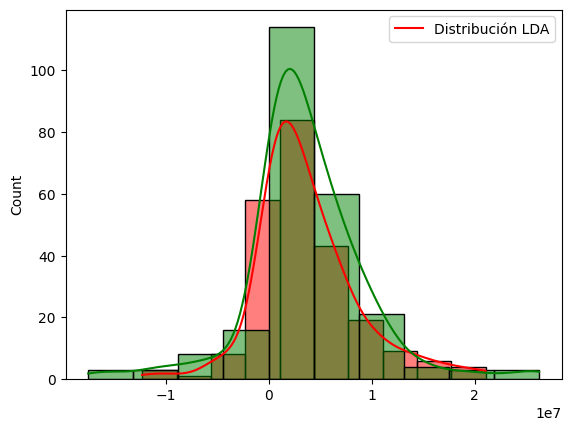

In [ ]:
#Graficamos
plt.figure()
sns.histplot(LDAo,bins=10,kde=True, color='red')
sns.histplot(LDAe1,bins=10,kde=True, color='green')
plt.legend(['Distribución LDA'])
plt.show()

In [ ]:
#Finca 2
mdex2 = metricas(LDAe2,0.955)
print("La media de los datos externos de la finca 2 es:", mdex2[0])
print("La varianza de los datos externos de la finca 2 es:", mdex2[1])
print("La desviación estandár de los datos externos de la finca 2 es:", mdex2[2])
print("La asimetria de los datos externos de la finca 2 es:", mdex2[3])
print("La kurtosis de los datos externos de la finca 2 es:", mdex2[4])
print("El tipo de distribución de los datos externos de la finca 2 es:",mdex2[5])
print("El error de los datos externos de la finca 2 es:", mdex2[6])

#Solamente me interesan estos limites, por que me interesan los datos de los limites internos
LS2 = mdex2[0]+2*mdex2[2]; LI2 = mdex2[0]-2*mdex2[2]
print("El limite superior de los datos externos de la finca 2 es:", LS2)
print("El limite inferior de los datos externos de la finca 2 es:", LI2)

La media de los datos externos de la finca 2 es: 3632318.7444114513
La varianza de los datos externos de la finca 2 es: 23971702178329.82
La desviación estandár de los datos externos de la finca 2 es: 4896090.499401519
La asimetria de los datos externos de la finca 2 es: 0.4900236881196671
La kurtosis de los datos externos de la finca 2 es: 1.8373973937508694
El tipo de distribución de los datos externos de la finca 2 es: Posible distribución uniforme
El error de los datos externos de la finca 2 es: 0.000702522382978724
El limite superior de los datos externos de la finca 2 es: 13424499.74321449
El limite inferior de los datos externos de la finca 2 es: -6159862.254391586


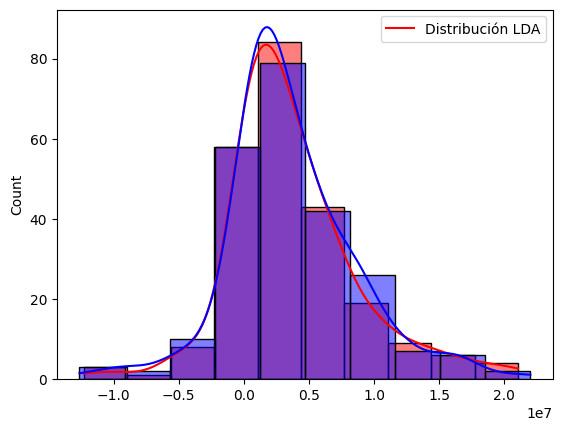

In [ ]:
#Graficamos
plt.figure()
sns.histplot(LDAo,bins=10,kde=True, color='red')
sns.histplot(LDAe2,bins=10,kde=True, color='blue')
plt.legend(['Distribución LDA'])
plt.show()

In [ ]:
#Finca 3
mdex3 = metricas(LDAe3, 0.955)
print("La media de los datos externos de la finca 3 es:", mdex3[0])
print("La varianza de los datos externos de la finca 3 es:", mdex3[1])
print("La desviación estandár de los datos externos de la finca 3 es:", mdex3[2])
print("La asimetría de los datos externos de la finca 3 es:", mdex3[3])
print("La kurtosis de los datos externos de la finca 3 es:", mdex3[4])
print("El tipo de distribución de los datos externos de la finca 3 es:",mdex3[5])
print("El error de los datos externos de la finca 3 es:", mdex3[6])

#Solamente me interesan estos limites, por que me interesan los datos de los limites internos
LS3 = mdex3[0]+2*mdex3[2]; LI3 = mdex3[0]-2*mdex3[2]
print("El limite superior de los datos externos de la finca 3 es:", LS3)
print("El limite inferior de los datos externos de la finca 3 es:", LI3)

La media de los datos externos de la finca 3 es: 3617978.618754104
La varianza de los datos externos de la finca 3 es: 27025444140456.133
La desviación estandár de los datos externos de la finca 3 es: 5198600.209715702
La asimetría de los datos externos de la finca 3 es: -0.056043609659266615
La kurtosis de los datos externos de la finca 3 es: 3.0356819592302866
El tipo de distribución de los datos externos de la finca 3 es: No es posible determinar la distribución
El error de los datos externos de la finca 3 es: 0.000702522382978724
El limite superior de los datos externos de la finca 3 es: 14015179.038185507
El limite inferior de los datos externos de la finca 3 es: -6779221.8006772995


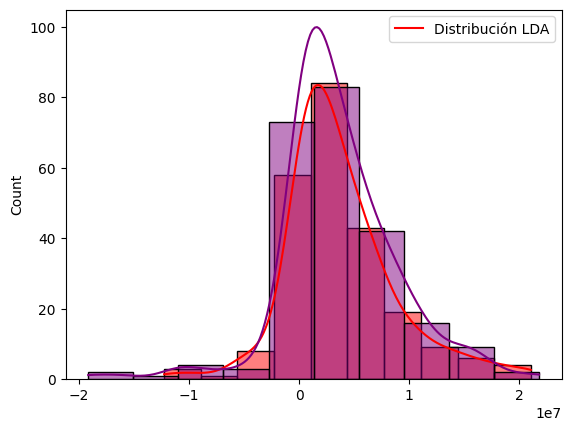

In [ ]:
#Graficamos
plt.figure()
sns.histplot(LDAo,bins=10,kde=True, color='red')
sns.histplot(LDAe3,bins=10,kde=True, color='purple')
plt.legend(['Distribución LDA'])
plt.show()

In [ ]:
#Finca 4
mdex4 = metricas(LDAe4, 0.955)
print("La media de los datos externos de la finca 4 es:", mdex4[0])
print("La varianza de los datos externos de la finca 4 es:", mdex4[1])
print("La desviación estandár de los datos externos de la finca 4 es:", mdex4[2])
print("La asimetria de los datos externos de la finca 4 es:", mdex4[3])
print("La kurtosis de los datos externos de la finca 4 es:", mdex4[4])
print("El tipo de distribución de los datos externos de la finca 4 es:",mdex4[5])
print("El error de los datos externos de la finca 4 es:", mdex4[6])

#Solamente me interesan estos limites, por que me interesan los datos de los limites internos
LS4 = mdex4[0]+2*mdex4[2]; LI4 = mdex4[0]-2*mdex4[2]
print("El limite superior de los datos externos de la finca 3 es:", LS4)
print("El limite inferior de los datos externos de la finca 3 es:", LI4)

La media de los datos externos de la finca 4 es: 3531558.1041763267
La varianza de los datos externos de la finca 4 es: 31903140180507.004
La desviación estandár de los datos externos de la finca 4 es: 5648286.481801981
La asimetria de los datos externos de la finca 4 es: -0.37357831711324163
La kurtosis de los datos externos de la finca 4 es: 3.67939264412383
El tipo de distribución de los datos externos de la finca 4 es: No es posible determinar la distribución
El error de los datos externos de la finca 4 es: 0.000702522382978724
El limite superior de los datos externos de la finca 3 es: 14828131.06778029
El limite inferior de los datos externos de la finca 3 es: -7765014.859427636


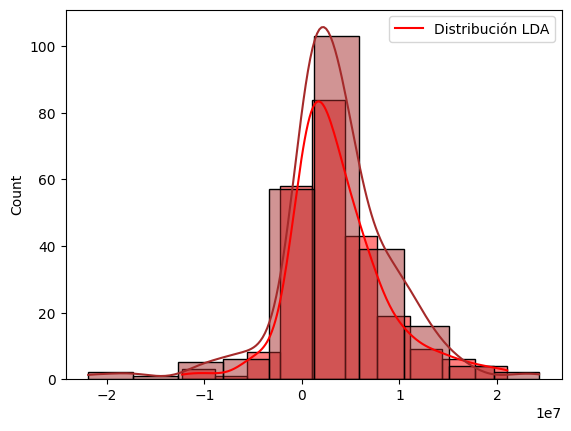

In [ ]:
#Graficamos
plt.figure()
sns.histplot(LDAo,bins=10,kde=True, color='red')
sns.histplot(LDAe4,bins=10,kde=True, color='brown')
plt.legend(['Distribución LDA'])
plt.show()

##3. Realizamos el Muestreo - Método Montecarlo

In [ ]:
counts, bin_edges= np.histogram(LDAo, bins=10)

LI = bin_edges[:-1] #Limites Inferiores
LS = bin_edges[1:]  #Limites Superiores
mc= (LI+LS)/2 #Marca de Clase (Medias de Clase)

pdf= counts/sum(counts) #Nos entrega la frecuencia relativa (% de datos por intervalo)

cdf= np.cumsum(pdf) #Construimos la ruleta (el acumulado de las probabilidades)

In [ ]:
#Hacemos la Tabla
df= pd.DataFrame(np.column_stack((LI,LS,mc,pdf,cdf)))
df.columns= ['LI','LS','mc','pdf','cdf']
df.head(10)

,LI,LS,mc,pdf,cdf
0,-1.227467e+07,-8.941032e+06,-1.060785e+07,0.012766,0.012766
1,-8.941032e+06,-5.607397e+06,-7.274214e+06,0.004255,0.017021
2,-5.607397e+06,-2.273761e+06,-3.940579e+06,0.034043,0.051064
3,-2.273761e+06,1.059874e+06,-6.069437e+05,0.246809,0.297872
4,1.059874e+06,4.393509e+06,2.726692e+06,0.357447,0.655319
5,4.393509e+06,7.727145e+06,6.060327e+06,0.182979,0.838298
6,7.727145e+06,1.106078e+07,9.393962e+06,0.080851,0.919149
7,1.106078e+07,1.439442e+07,1.272760e+07,0.038298,0.957447
8,1.439442e+07,1.772805e+07,1.606123e+07,0.025532,0.982979
9,1.772805e+07,2.106169e+07,1.939487e+07,0.017021,1.000000


In [ ]:
#Tamaño del Intervalo
TI= LS[0]-LI[0]

#Confiabilidad del 99,9% - 1000 datos
LDAom=np.zeros((1000,1))

for i in range(1000):
  print("Interación:",i)
  aleatorio = rnd.random()
  print("El aleatorio es:", aleatorio)
  print("La lista de  números es:\n",cdf)
  print(aleatorio<cdf)
  intervalo = np.array(np.where(aleatorio<cdf))
  print("El intervalo de trabajo es:\n",intervalo[0,0])
  print("Los limites inferiores son:\n", LI)
  aleatorio2= rnd.random()
  print("El intervalo seleccionado es:\n", LI[intervalo[0,0]])
  LDAom[i]=LI[intervalo[0,0]]+TI*aleatorio2
  print("El valor muestreado es:", LDAom[i])

Interación: 0
El aleatorio es: 0.6663302228680056
La lista de  números es:
 [0.01276596 0.01702128 0.05106383 0.29787234 0.65531915 0.83829787
 0.91914894 0.95744681 0.98297872 1.        ]
[False False False False False  True  True  True  True  True]
El intervalo de trabajo es:
 5
Los limites inferiores son:
 [-12274667.1447979   -8941031.86058199  -5607396.57636608
  -2273761.29215016   1059873.99206575   4393509.27628167
   7727144.56049758  11060779.84471349  14394415.12892941
  17728050.41314532]
El intervalo seleccionado es:
 4393509.276281666
El valor muestreado es: [5542370.95308852]
Interación: 1
El aleatorio es: 0.35697890235402174
La lista de  números es:
 [0.01276596 0.01702128 0.05106383 0.29787234 0.65531915 0.83829787
 0.91914894 0.95744681 0.98297872 1.        ]
[False False False False  True  True  True  True  True  True]
El intervalo de trabajo es:
 4
Los limites inferiores son:
 [-12274667.1447979   -8941031.86058199  -5607396.57636608
  -2273761.29215016   1059873.99

In [ ]:
#Encontramos las métricas después del muestreo
mobsm = metricas(LDAom, 0.999)
print("La media de los datos internos muestreados es:", mobsm[0])
print("La varianza de los datos internos muestreados es:", mobsm[1])
print("La desviación estandár de los datos internos muestreados es:", mobsm[2])
print("La asimetria de los datos internos muestreados es:", mobsm[3])
print("La kurtosis de los datos internos muestreados es:", mobsm[4])
print("El tipo de distribución de los datos internos muestreados es:",mobsm[5])
print("El error de los datos internos muestreados es:", mobsm[6])

#Solamente me interesan estos limites, por que me interesan los datos de los limites internos
LSom = mobsm[0]+2*mobsm[2]; LIom = mobsm[0]-2*mobsm[2]
print("El limite superior de los datos externos es:", LSom)
print("El limite inferior de los datos externos es:", LIom)

La media de los datos internos muestreados es: 3633127.039473881
La varianza de los datos internos muestreados es: 24288010389259.215
La desviación estandár de los datos internos muestreados es: 4928286.760047473
La asimetria de los datos internos muestreados es: [0.91510727]
La kurtosis de los datos internos muestreados es: [1.29460032]
El tipo de distribución de los datos internos muestreados es: Posible distribución uniforme
El error de los datos internos muestreados es: 3.837758400000003e-06
El limite superior de los datos externos es: 13489700.559568826
El limite inferior de los datos externos es: -6223446.480621065


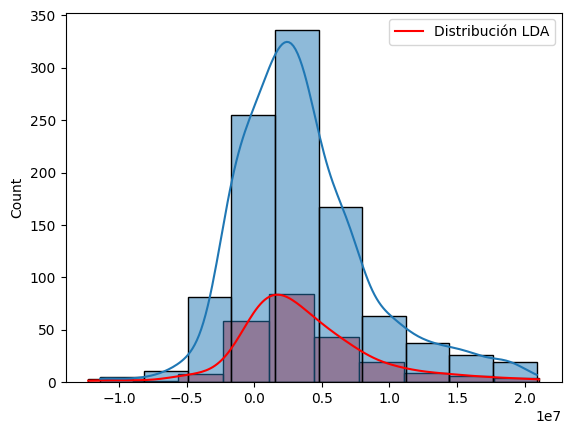

In [ ]:
#Graficamos
plt.figure()
sns.histplot(LDAo,bins=10,kde=True, color='red')
sns.histplot(LDAom,bins=10,kde=True, color='green')
plt.legend(['Distribución LDA'])
plt.show()

## 4. Calculamos los Parámetros de Riesgo

In [ ]:
#Creamos Función
def calcular_parametros_riesgo(lda):

    u = np.mean(lda)                  #Pérdidas Esperadas
    opvar = np.percentile(lda, 99.9)  #Pérdidas Catastróficas
    pne = (u + opvar) / 2             #Pérdidas No Esperadas

    return u, pne, opvar

In [ ]:
#Parámetros de Riesgo Datos Internos
prdo = calcular_parametros_riesgo(LDAo)
print("Las pérdidas esperadas son:\n", prdo[0])
print("Las pérdidas no esperadas son:\n", prdo[1])
print("Las pérdidas catastróficas son de:\n", prdo[2])

Las pérdidas esperadas son:
 3770378.847216564
Las pérdidas no esperadas son:
 12409867.222065503
Las pérdidas catastróficas son de:
 21049355.59691444


In [ ]:
#Parámetros de Riesgo Datos Internos Muestreados
prdom = calcular_parametros_riesgo(LDAom)
print("Las pérdidas esperadas son:\n", prdom[0])
print("Las pérdidas no esperadas son:\n", prdom[1])
print("Las pérdidas catastróficas son de:\n", prdom[2])

Las pérdidas esperadas son:
 3633127.039473881
Las pérdidas no esperadas son:
 12103095.516628891
Las pérdidas catastróficas son de:
 20573063.993783902


In [ ]:
#Parámetros de Riesgo Finca 1
prde1 = calcular_parametros_riesgo(LDAe1)
print("Las pérdidas esperadas son:\n", prde1[0])
print("Las pérdidas no esperadas son:\n", prde1[1])
print("Las pérdidas catastróficas son de:\n", prde1[2])

Las pérdidas esperadas son:
 3648873.460819753
Las pérdidas no esperadas son:
 14926725.719033558
Las pérdidas catastróficas son de:
 26204577.977247365


In [ ]:
#Parámetros de Riesgo Finca 2
prde2 = calcular_parametros_riesgo(LDAe2)
print("Las pérdidas esperadas son:\n", prde2[0])
print("Las pérdidas no esperadas son:\n", prde2[1])
print("Las pérdidas catastróficas son de", prde2[2])

Las pérdidas esperadas son:
 3632318.7444114513
Las pérdidas no esperadas son:
 12510809.614606299
Las pérdidas catastróficas son de 21389300.484801147


In [ ]:
#Parámetros de Riesgo Finca 3
prde3 = calcular_parametros_riesgo(LDAe3)
print("Las pérdidas esperadas son:\n", prde3[0])
print("Las pérdidas no esperadas son:\n", prde3[1])
print("Las pérdidas catastróficas son de", prde3[2])

Las pérdidas esperadas son:
 3617978.618754104
Las pérdidas no esperadas son:
 12413896.651669674
Las pérdidas catastróficas son de 21209814.684585243


In [ ]:
#Parámetros de Riesgo Finca 4
prde4 = calcular_parametros_riesgo(LDAe4)
print("Las pérdidas esperadas son:\n", prde4[0])
print("Las pérdidas no esperadas son:\n", prde4[1])
print("Las pérdidas catastróficas son de", prde4[2])

Las pérdidas esperadas son:
 3531558.1041763267
Las pérdidas no esperadas son:
 13657923.795711879
Las pérdidas catastróficas son de 23784289.48724743


##5. Mostramos Resultados de las Métricas

In [ ]:
#Mostramos los resultados en una tabla
data = {
    'Métrica/Datos': ['Media/Pérdidas Esperadas', 'Pérdidas No Esperadas', 'Pérdidas Catastróficas','Varianza', 'Desviación', 'Asimetría', 'Kurtosis', 'Tipo de Distribución', 'Error'],
    'Datos Internos': [mobs[0], prdo[0], prdo[2], mobs[1], mobs[2], mobs[3], mobs[4], mobs[5], mobs[6]],
    'Datos Internos Muestreados': [mobsm[0], prdom[0], prdom[2], mobsm[1], mobsm[2], mobsm[3], mobsm[4], mobsm[5], mobsm[6]],
    'Finca 1': [mdex1[0], prde1[0], prde1[2], mdex1[1], mdex1[2], mdex1[3], mdex1[4], mdex1[5], mdex1[6]],
    'Finca 2': [mdex2[0], prde2[0], prde2[2], mdex2[1], mdex2[2], mdex2[3], mdex2[4], mdex2[5], mdex2[6]],
    'Finca 3': [mdex3[0], prde3[0], prde3[2], mdex3[1], mdex3[2], mdex3[3], mdex3[4], mdex3[5], mdex3[6]],
    'Finca 4': [mdex4[0], prde4[0], prde4[2], mdex4[1], mdex4[2], mdex4[3], mdex4[4], mdex4[5], mdex4[6]]
}
df = pd.DataFrame(data)
print(df)

#Exportamos a Excel
data_excel = df.to_excel('Resultados_Métricas.xlsx')

              Métrica/Datos                 Datos Internos  \
0  Media/Pérdidas Esperadas                 3770378.847217   
1     Pérdidas No Esperadas                 3770378.847217   
2    Pérdidas Catastróficas                21049355.596914   
3                  Varianza          24846802647976.566406   
4                Desviación                 4984656.723183   
5                 Asimetría                        0.79675   
6                  Kurtosis                       1.988308   
7      Tipo de Distribución  Posible distribución uniforme   
8                     Error                       0.000703   

      Datos Internos Muestreados                       Finca 1  \
0                 3633127.039474                 3648873.46082   
1                 3633127.039474                 3648873.46082   
2                20573063.993784               26204577.977247   
3          24288010389259.214844         32632794931642.707031   
4                 4928286.760047                5

##6. Método de Aceptación y Rechazo

In [ ]:
def integracion(LDAo, LDAe, mobs, mdex):
    xint = LDAe  # Los datos de integración son los externos

    # Evaluamos los datos externos con respecto a la estructura interna
    VPoint = np.exp(-0.5 * ((xint - mobs[0]) / mobs[2]) ** 2)

    # Evaluamos los datos externos con respecto a la estructura externa
    VPeint = np.exp(-0.5 * ((xint - mdex[0]) / mdex[2]) ** 2)

    # Donde los datos externos estén por debajo de los datos internos
    filas = np.where(VPeint <= VPoint)[0]
    XDint = LDAe[filas]  # datos de integración

    # Se integran los datos
    LDAo2 = np.concatenate((LDAo, XDint))

    return LDAo2

**Finca 1**

In [ ]:
#Integramos los datos con la finca 1
LDAo2 = integracion(LDAo, LDAe1, mobs, mdex1)
mint = metricas(LDAo2, 0.955)
print("El número de datos es:", len(LDAo2))
print("La media de los datos es:", mint[0])
print("La desviación estandár de los datos es:", mint[2])
print("La asimetria de los datos es:", mint[3])
print("La kurtosis de los datos es:", mint[4])
print("El error de los datos es:", mint[6])

cas_antes=mobs[3]
cas_despues=mint[3]
var_cas = ((cas_antes-cas_despues)/cas_antes)*100
print("La asimetría cambio un", var_cas)
kur_antes = mobs[4]
kur_despues = mint[4]
var_kur = ((kur_antes-kur_despues)/kur_antes)*100
print("La kurtosis cambio un", var_kur)

El número de datos es: 250
La media de los datos es: 3723885.4752840786
La desviación estandár de los datos es: 4939097.097204038
La asimetria de los datos es: 0.7839303783724076
La kurtosis de los datos es: 1.9715657875389638
El error de los datos es: 0.0006603710400000005
La asimetría cambio un 1.6090223083913922
La kurtosis cambio un 0.8420239442686703


**Finca 2**

In [ ]:
#Integramos los datos con la finca 2
LDAe2=np.array(LDAe2)
LDAo22 = integracion(LDAo, LDAe2, mobs, mdex2)
mint = metricas(LDAo22, 0.955)
print("El número de datos es:", len(LDAo22))
print("La media de los datos es:", mint[0])
print("La desviación estandár de los datos es:", mint[2])
print("La asimetria de los datos es:", mint[3])
print("La kurtosis de los datos es:", mint[4])
print("El error de los datos es:", mint[6])

cas_antes2=mobs[3]
cas_despues2=mint[3]
var_cas2 = ((cas_antes2-cas_despues2)/cas_antes2)*100
print("La asimetría cambio un", var_cas2)
kur_antes2 = mobs[4]
kur_despues2 = mint[4]
var_kur2 = ((kur_antes2-kur_despues2)/kur_antes2)*100
print("La kurtosis cambio un", var_kur2)

El número de datos es: 343
La media de los datos es: 4639800.55855417
La desviación estandár de los datos es: 5422860.529305557
La asimetria de los datos es: 0.2285888709590825
La kurtosis de los datos es: 1.2423888665164098
El error de los datos es: 0.00048132000000000036
La asimetría cambio un 71.30984699204926
La kurtosis cambio un 37.51526514785056


**Finca 3**

In [ ]:
#Integramos los datos con la finca 3
LDAe3=np.array(LDAe3)
LDAo23 = integracion(LDAo, LDAe3, mobs, mdex3)
mint = metricas(LDAo23, 0.955)
print("El número de datos es:", len(LDAo23))
print("La media de los datos es:", mint[0])
print("La desviación estandár de los datos es:", mint[2])
print("La asimetria de los datos es:", mint[3])
print("La kurtosis de los datos es:", mint[4])
print("El error de los datos es:", mint[6])

cas_antes3=mobs[3]
cas_despues3=mint[3]
var_cas3 = ((cas_antes3-cas_despues3)/cas_antes3)*100
print("La asimetría cambio un", var_cas3)
kur_antes3 = mobs[4]
kur_despues3= mint[4]
var_kur3 = ((kur_antes3-kur_despues3)/kur_antes3)*100
print("La kurtosis cambio un", var_kur3)

El número de datos es: 287
La media de los datos es: 4026200.054704191
La desviación estandár de los datos es: 4562393.532870975
La asimetria de los datos es: 0.6962308448055156
La kurtosis de los datos es: 2.652824411174814
El error de los datos es: 0.000575236097560976
La asimetría cambio un 12.61617688334194
La kurtosis cambio un -33.421213284333874


**Finca 4**

In [ ]:
#Integramos los datos con la finca 4
LDAe4=np.array(LDAe4)
LDAo24 = integracion(LDAo, LDAe4, mobs, mdex4)
mint = metricas(LDAo24, 0.955)
print("El número de datos es:", len(LDAo24))
print("La media de los datos es:", mint[0])
print("La desviación estandár de los datos es:", mint[2])
print("La asimetria de los datos es:", mint[3])
print("La kurtosis de los datos es:", mint[4])
print("El error de los datos es:", mint[6])

cas_antes4=mobs[3]
cas_despues4=mint[3]
var_cas4 = ((cas_antes4-cas_despues4)/cas_antes4)*100
print("La asimetría cambio un", var_cas4)
kur_antes4 = mobs[4]
kur_despues4 = mint[4]
var_kur4 = ((kur_antes4-kur_despues4)/kur_antes4)*100
print("La kurtosis cambio un", var_kur4)

El número de datos es: 271
La media de los datos es: 3856654.4935676935
La desviación estandár de los datos es: 4649699.219661966
La asimetria de los datos es: 0.7964871248441838
La kurtosis de los datos es: 2.65245829392802
El error de los datos es: 0.0006091983763837642
La asimetría cambio un 0.03302704647949504
La kurtosis cambio un -33.40279977491884


##7. Hacemos la Integración de los Datos mediante la Teoria de la Credibilidad

In [ ]:
#Función de Credibilidad
def Credibilidad(LDAo,LDAe):
  #LDAo = Indica los datos observados-internos
  #LDAe: Indica los datos externos-integración

  NDo=len(LDAo);NDe=len(LDAe)
  varo=np.var(LDAo);vare=np.var(LDAe)
  uo=np.mean(LDAo);ue=np.mean(LDAe)

  #MH=media hipotetica
  EPV=(NDo*varo+NDe*vare)/(NDo+NDe)
  MH=(NDo*uo+NDe*ue)/(NDo+NDe) #Media Hipotética: Busca un punto central entre las dos bases de datos
  Cr=EPV

  pNDo=NDo/(NDo+NDe);pNDe=NDe/(NDo+NDe)
  VHM=pNDo*uo**2+pNDe*ue**2-MH**2   #Varianza de los datos con respecto a un punto central o la media hipotética

  Cr=NDo/(NDo+(EPV/VHM))

  return Cr

**Finca 1**

In [ ]:
Cr1 = Credibilidad(LDAo,LDAe1)
print("La Credibilidad de la Finca 1 es de:",Cr1)

#Media de los datos integrados
uint1=np.mean(LDAo)*Cr1+np.mean(LDAe1)*(1-Cr1)
print("La media de los datos integrados es:", uint1)

La Credibilidad de la Finca 1 es de: 0.02929558758622337
La media de los datos integrados es: 3652433.0325091383


**Finca 2**

In [ ]:
Cr2 = Credibilidad(LDAo,LDAe2)
print("La Credibilidad de la Finca 2 es de:",Cr2)

#Media de los datos integrados
uint2=np.mean(LDAo)*Cr2+np.mean(LDAe2)*(1-Cr2)
print("La media de los datos integrados es:", uint2)

La Credibilidad de la Finca 2 es de: 0.043864117325275884
La media de los datos integrados es: 3638374.6289588343


**Finca 3**

In [ ]:
Cr3 = Credibilidad(LDAo,LDAe3)
print("La Credibilidad de la Finca 3 es de:",Cr3)

#Media de los datos integrados
uint3=np.mean(LDAo)*Cr3+np.mean(LDAe3)*(1-Cr3)
print("La media de los datos integrados es:", uint3)

La Credibilidad de la Finca 3 es de: 0.04998115234047316
La media de los datos integrados es: 3625595.7577896086


**Finca 4**

In [ ]:
Cr4 = Credibilidad(LDAo,LDAe4)
print("La Credibilidad de la Finca 4 es de:",Cr4)

#Media de los datos integrados
uint4=np.mean(LDAo)*Cr4+np.mean(LDAe4)*(1-Cr4)
print("La media de los datos integrados es:", uint4)

La Credibilidad de la Finca 4 es de: 0.10561835661350101
La media de los datos integrados es: 3556781.9585814513


###6.1. Resultados de la Integración mediante la Teoría de la Credibilidad

In [ ]:
data1 = {
    'Finca': ['Finca 1', 'Finca 2', 'Finca 3', 'Finca 4'],
    'Credibilidad': [Cr1, Cr2, Cr3, Cr4],
    'Media de los Datos Integrados': [uint1, uint2, uint3, uint4]
}
df1 = pd.DataFrame(data1)
print(df1)

     Finca  Credibilidad  Media de los Datos Integrados
0  Finca 1      0.029296                   3.652433e+06
1  Finca 2      0.043864                   3.638375e+06
2  Finca 3      0.049981                   3.625596e+06
3  Finca 4      0.105618                   3.556782e+06


##8. Informe Final en Excel

In [ ]:
#Finca 1
df_finca1 = pd.DataFrame({'LDA_Integrado_Finca1': LDAo2})

#Finca 2
df_finca2 = pd.DataFrame({'LDA_Integrado_Finca2': LDAo22})

#Finca 3
df_finca3 = pd.DataFrame({'LDA_Integrado_Finca3': LDAo23})

#Finca 4
df_finca4 = pd.DataFrame({'LDA_Integrado_Finca4': LDAo24})

In [ ]:
#Concatenar los DataFrames
df_final = pd.concat([XDBo, df_finca1, df_finca2, df_finca3, df_finca4], axis=1)

#Exportar a Excel
df_final.to_excel('Informe_Final_Integracion.xlsx', index=False)

##9. Análisis de Resultados

Los datos observados para este caso (XDBo) contienen un total de 235 datos, con los cuales se hizo el muestreo montecralo y la integración de datos con el fin de saber la caracterización del riesgo asociado con la pérdida de productividad mensual en sus operaciones. Es importante tener en cuenta que el muestreo se realizó a una confiabilidad del 99.9%.
En el excel creado "Resultados_Métricas" se aprecia el comportamiento de las bases de datos, junto con el de los datos internos muestreados. Mirando los resultados de los datos internos con los muestreados, vemos que los resultados obtenidos fueron muy similares, por ejemplo, la media pasó de 3770378,84721656 a 3433371,79008101, la varianza 2,48 a 2,71, y la curtosis de 1,98 a 1,02. Asimismo, vemos que en ambos casos se encuentra una posible distribución uniforme. No obstante, el error fue muy superior en los datos muestreados (3,83), a los no muestreados (0,00007). Es importante resaltar, que las pérdidas catastróficas disminuyen con el muestreo (21 049 356 a 20 832 633), siendo estos resultados todavía elevados para ser pérdidas catastróficas. Cuando se realizó la teoría de la credibilidad se encontró que los datos con mayor credibilidad de los datos internos es en "Finca 4" (0.105) y los que tuvieron la menor fue los de la "Finca 1" (0.029). Ahora, cuando se realizó la integración de datos, vemos que los resultados dieron que la integración con la finca 1 da un total de 250 datos, con la finca 2 343 datos, con la 3 287 datos, y la 4 con 271.